In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("11-iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop("Id",axis=1,inplace=True)

In [6]:
df.info()
# there are no non-null data and almost all of our data are consist of numbers(float or integer ) not string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

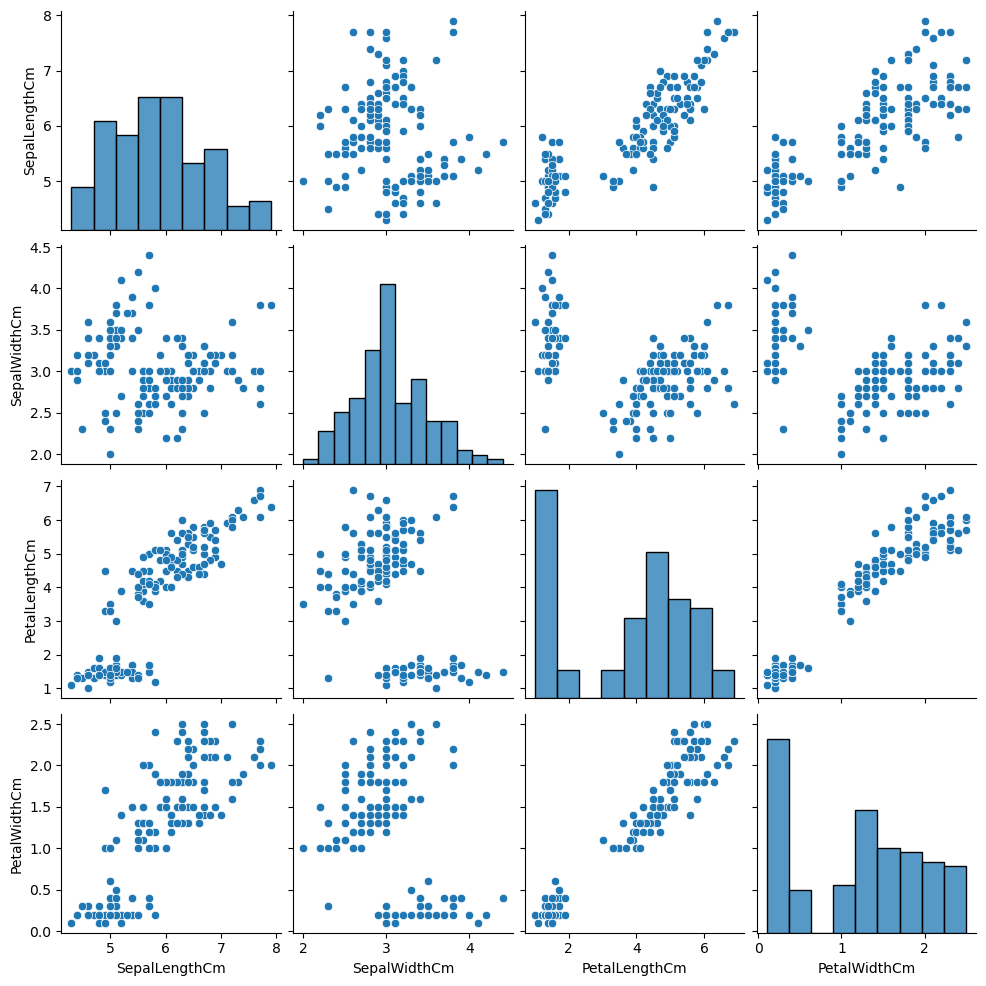

In [9]:
sns.pairplot(df)
plt.show()
# I run this code because I want to show you  relationship between all columns

In [47]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [52]:
# We can see correlation between variables in heatmap 
# Heatmap result= there are strenght correlation in some variables
#if numbers how close to 1 is better for linear correlation

<Axes: >

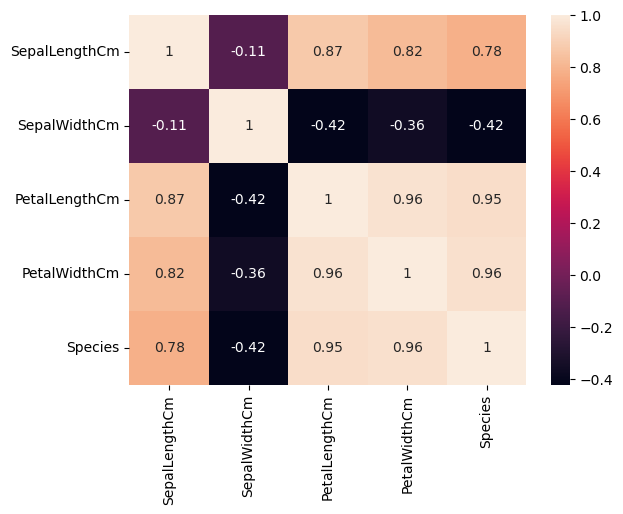

In [51]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

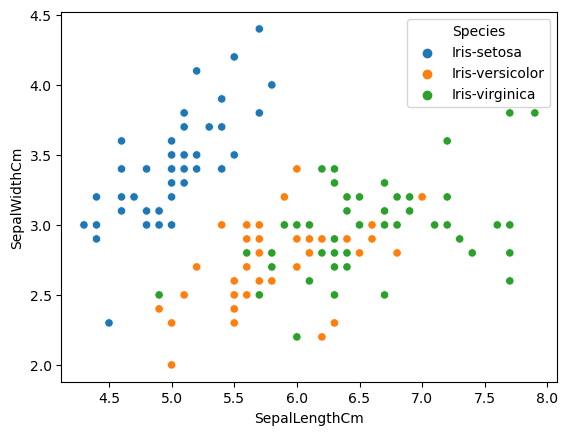

In [11]:
sns.scatterplot(data=df,x="SepalLengthCm",y="SepalWidthCm",hue="Species")
plt.show()

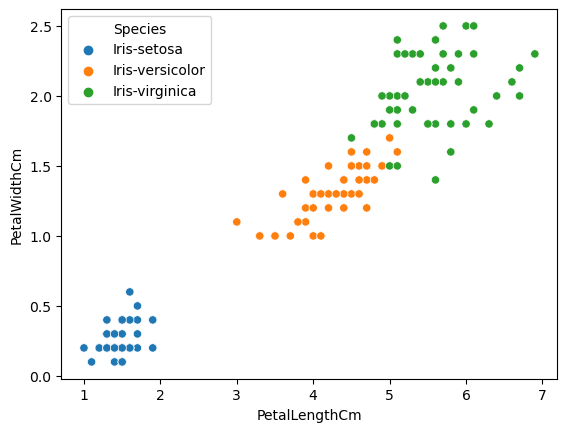

In [12]:
sns.scatterplot(data=df,x="PetalLengthCm",y="PetalWidthCm",hue="Species")
plt.show()

In [13]:
# Machine Learning algorithm can not understand object varies
# we should label encoding in Species columns to put into  machine learning algorithm.
from sklearn.preprocessing import LabelEncoder

In [14]:
label=LabelEncoder()

In [15]:
df["Species"]=label.fit_transform(df["Species"])

In [16]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [17]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=14)

In [20]:
scaler=StandardScaler()

In [21]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
regression=LogisticRegression()

In [23]:
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)

In [24]:
# we can see performance of our regression by some of metrics 

In [25]:
accuracy=accuracy_score(y_test,y_pred)
classification=classification_report(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
print("accuracy score:\n",accuracy)
print("classification report:\n",classification)
print("confusion matrix:\n",confusion)

accuracy score:
 0.9666666666666667
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

confusion matrix:
 [[14  0  0]
 [ 0  9  0]
 [ 0  1  6]]


In [26]:
# we get %97 accuracy score (100x0.97) so my regression is very powerful to predict output use by new variables :D 
# but ı can improve this regression use gridsearch 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params={"penalty":["l1","l2","elasticnet"],
        "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
        "C":[1,10,100,1000]
       }

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
cv=StratifiedKFold()

In [31]:
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=params,scoring="accuracy",n_jobs=-1,refit=True,cv=cv)
grid.fit(X_train_scaled,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [32]:
grid.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'sag'}

In [33]:
y_pred2=grid.predict(X_test_scaled)

In [34]:
accuracy=accuracy_score(y_test,y_pred2)
classification=classification_report(y_test,y_pred2)
confusion=confusion_matrix(y_test,y_pred2)
print("accuracy score:\n",accuracy)
print("classification report:\n",classification)
print("confusion matrix:\n",confusion)

accuracy score:
 1.0
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
 [[14  0  0]
 [ 0  9  0]
 [ 0  0  7]]


In [35]:
# we  get %100 accuracy score :DDDDDD

In [36]:
# this part of project is unnecessary but ı wonder result if ı train iris data set in SVC(Support Vector Classifier)

In [37]:
from sklearn.svm import SVC
svc=SVC()
params2={"C":[1,10,100,1000],
         "kernel":["linear", "poly", "rbf", "sigmoid"],
         "gamma":[1,0.1,0.01,0.001]
        
        }

In [38]:
grid2=GridSearchCV(estimator=svc,param_grid=params2,n_jobs=-1,scoring="accuracy",refit=True,cv=cv)
grid2.fit(X_train_scaled,y_train)

,estimator,SVC()
,param_grid,"{'C': [1, 10, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [39]:
grid2.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [40]:
y_pred3=grid2.predict(X_test_scaled)

In [41]:
accuracy=accuracy_score(y_test,y_pred3)
classification=classification_report(y_test,y_pred3)
confusion=confusion_matrix(y_test,y_pred3)
print("accuracy score:\n",accuracy)
print("classification report:\n",classification)
print("confusion matrix:\n",confusion)

accuracy score:
 1.0
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
 [[14  0  0]
 [ 0  9  0]
 [ 0  0  7]]
